In [48]:
np.set_printoptions(precision=3)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
X = pd.read_csv('data/X.csv')
y = pd.read_csv('data/y.csv', header=None)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, 
                                                      random_state=1)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_valid_prediction = model.predict(X_valid)

In [37]:
model.coef_

array([[-0.83884271,  1.42840065,  0.40532651,  0.67942473, -2.53039124,
         1.93381643,  0.10090715, -3.23615418,  2.70318306, -1.91729896,
        -2.15578621,  0.58227649, -4.13433172]])

<BarContainer object of 13 artists>

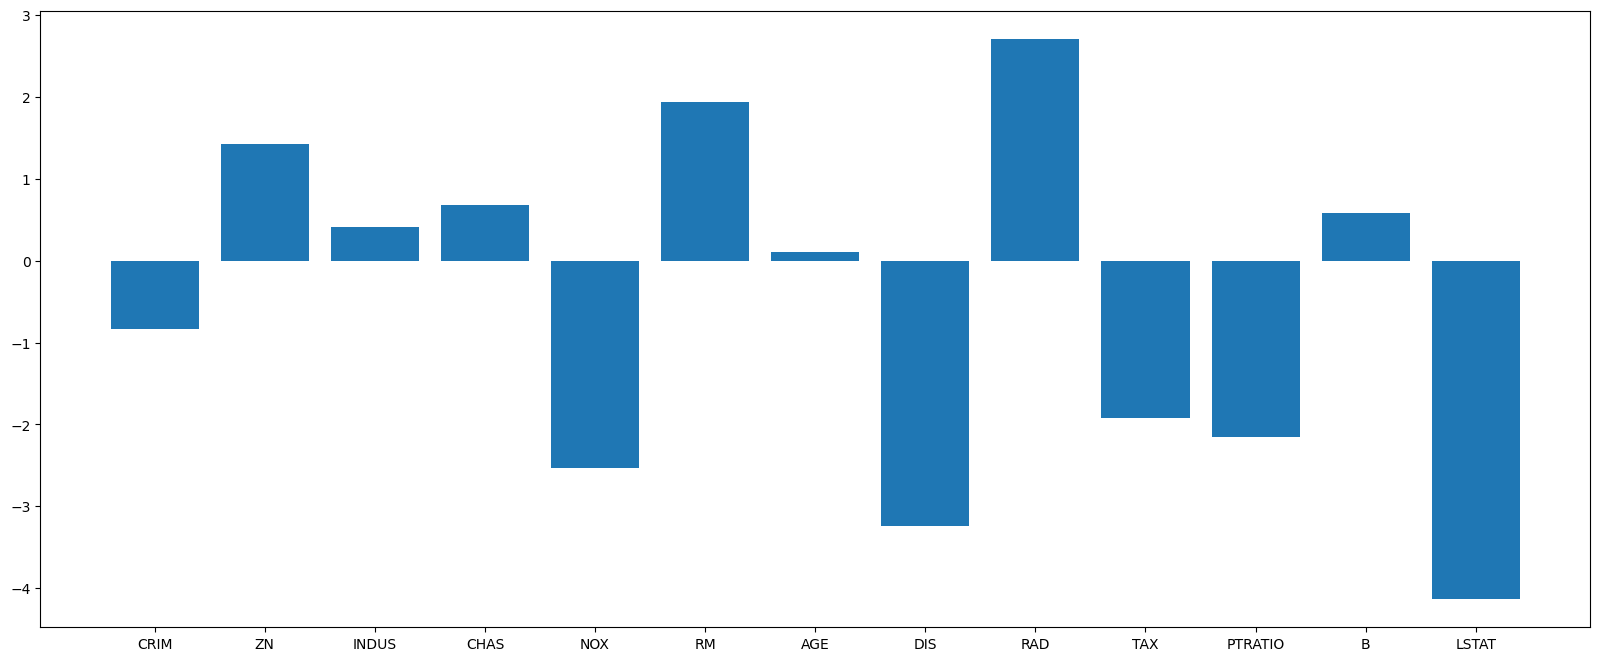

In [38]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_.flatten())

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f'Train MSE: {mean_squared_error(y_train, y_train_prediction): 0.3f}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_prediction): 0.3f}')

print(f'Train MAE: {mean_absolute_error(y_train, y_train_prediction): 0.3f}')
print(f'Test MAE: {mean_absolute_error(y_test, y_test_prediction): 0.3f}')

Train MSE:  23.513
Test MSE:  494838.821
Train MAE:  3.344
Test MAE:  594.908


In [49]:
from sklearn.model_selection import cross_val_score

result = cross_val_score(estimator=LinearRegression(), X=X, y=y, scoring='neg_mean_absolute_error', cv=5)
result

array([-2.622, -3.907, -4.387, -5.571, -4.763])

In [46]:
print(f'Среднее MAE равно {-result.mean()}',
      f'стандартное отклонение MAE равно {result.std()}')

Среднее MAE равно 4.249968544192527 стандартное отклонение MAE равно 0.9792537069067571
